# Python统计基础:如何描述数据


在大数据和人工智能时代，数据科学和机器学习已在许多科学技术领域中变得至关重要。 处理数据的必要方面是能够直观地描述，汇总和表示数据。 Python statistics是全面，流行和广泛使用的工具，可帮助您处理数据。

在本教程中，您将学习：

* 可以用来描述和总结数据集的数字量

* 如何在纯Python中计算描述性统计信息

* 如何使用可用的Python库获取描述性统计信息

* 如何可视化数据集


[从此下载示例代码](https://realpython.com/python-statistics/)

## 理解描述性统计

描述性统计信息是关于数据的描述和汇总。 它使用两种主要方法：

* 定量方法以数字方式描述和汇总数据。

* 视觉方法通过图表，曲线图，直方图和其他图形来说明数据。

可以将描述性统计信息应用于一个或多个数据集或变量。 描述和总结单个变量时，就是在进行单变量分析。 当您搜索一对变量之间的统计关系时，就是在进行双变量分析。 同样，多变量分析一次涉及多个变量。

### 措施类型

描述性统计包含以下度量类型：
（1） 集中趋势用于描述有关数据中心的信息。有用的度量包：括均值，中位数和众数。
（2） 可变性描述有关数据传播的信息。有用的度量包括：方差和标准偏差。
（3） 相关性或联合可变性描述有关数据集中一对变量之间的关系。有用的度量包括：协方差和相关系数。


### 总体和样本

在统计学中，总体是您所感兴趣的所有元素或项目的集合。它们的数量通常很大，这使得它们不适合收集和分析数据。这就是为什么统计学家通常试图通过选择和检查一个有代表性的子集来得出一些关于总体的结论。总体的这个子集称为样本。理想情况下，样本应在令人满意的程度上保持总体的基本统计特征。这样，您就可以使用样本来收集关于总体的结论。

### 异常点
异常点是指与样本或总体中大多数数据有显著差异的数据点。有许多可能导致离群值的原因，但以下是一些导致您离群的原因：

* 数据自然变化

* 观察系统行为的变化

* 数据收集错误

数据收集错误是异常值的一个特别突出的原因。例如，测量仪器或程序的局限性可能意味着无法获得正确的数据。其他错误可能由错误计算、数据污染、人为错误等引起。异常点并没有精确的数学定义。您必须依靠经验、有关感兴趣的主题的知识和常识来确定数据点是否为离群值以及如何处理它。

## 选择Python统计库

有许多Python统计库可供您使用，但是在本教程中，您将学习一些最流行和广泛使用的统计库。

Python的 statistics 是用于描述性统计信息的内置Python库。 如果您的数据集不是太大，或者您不能依赖导入其他库，则可以使用它。

NumPy是用于数字计算的第三方库，已针对使用一维和多维数组进行了优化。它的主要类型是称为ndarray的数组类型。 该库包含许多用于统计分析的例程。

SciPy是基于NumPy的用于科学计算的第三方库。与NumPy相比，它提供了其他功能，包括用于统计分析的scipy.stats。

Pandas是基于NumPy的用于数值计算的第三方库。它擅长处理带有Series对象的带标签的一维（1D）数据和带有DataFrame对象的二维（2D）数据。

Matplotlib是用于数据可视化的第三方库。 与NumPy，SciPy和Pandas结合使用时效果很好。

请注意，在许多情况下，可以使用Series和DataFrame对象代替NumPy数组。 通常，您可能只是将它们传递给NumPy或SciPy统计函数。 此外，可以通过调用.values或.to_numpy（）从Series或DataFrame中将未标记的数据作为np.ndarray对象。

### Python Statistics库入门

内建的Python统计库拥有数量相对较少的最重要的统计函数。官方文档是查找详细信息的宝贵资源。如果仅限于纯Python，那么Python统计库可能是正确的选择。

开始学习NumPy的一个好地方是官方用户指南，特别是快速入门和基础部分。官方参考可以帮助您刷新您的记忆在具体NumPy概念。在阅读本教程时，您可能想查看统计部分和官方scipy。stats也引用。

如果您想学习panda，那么官方入门页面是一个很好的起点。数据结构介绍可以帮助您了解基本的数据类型、系列和DataFrame。同样，优秀的官方介绍性教程旨在为您提供足够的信息，以便开始在实践中有效地使用Pandas。

matplotlib有一个全面的官方用户指南，您可以使用它来深入了解使用这个库的细节。Matplotlib解剖对于想要开始使用Matplotlib及其相关库的初学者来说是一份非常好的资源。


### 描述性统计计算

首先导入您将需要的所有包

In [1]:
import math
import statistics
import numpy
import scipy.stats
import pandas

这些是进行Python统计数据处理所需的库。稍后，我们还将导入matplotlib.pyplot以进行数据可视化。

让我们创建一些数据来处理。 您将从包含一些任意数字数据的Python列表开始：

In [2]:
x = [8.0, 1, 2.5, 4, 28.0]
x_with_nan = [8.0, 1, 2.5, math.nan, 4, 28.0]

In [3]:
x

[8.0, 1, 2.5, 4, 28.0]

In [4]:
x_with_nan

[8.0, 1, 2.5, nan, 4, 28.0]

现在我们有了列表x_with_nan和列表x。它们几乎是相同的，不同的是带有nan的x包含一个nan值。当Python统计例程遇到非数字值(nan)时，理解它们的行为是很重要的。在数据科学中，丢失值是很常见的，通常会用nan替换它们。

在Python中，可以使用以下任何一种方法获得nan值

* float('nan')
* math.nan
* numpy.nan

In [5]:
math.isnan(numpy.nan), numpy.isnan(math.nan), math.isnan(x_with_nan[3]), numpy.isnan(x_with_nan[3])


(True, True, True, True)

可以看到这些功能都是等效的。 但是，请记住，比较两个nan值是否相等会返回False。 换句话说，math.nan == math.nan是False！


现在，创建与x和x_with_nan对应的np.ndarray和pd.Series对象：


In [6]:
y, y_with_nan = numpy.array(x), numpy.array(x_with_nan)
z, z_with_nan = pandas.Series(x), pandas.Series(x_with_nan)
y, y_with_nan,z,z_with_nan

(array([ 8. ,  1. ,  2.5,  4. , 28. ]),
 array([ 8. ,  1. ,  2.5,  nan,  4. , 28. ]),
 0     8.0
 1     1.0
 2     2.5
 3     4.0
 4    28.0
 dtype: float64,
 0     8.0
 1     1.0
 2     2.5
 3     NaN
 4     4.0
 5    28.0
 dtype: float64)

现在有两个NumPy数组(y_with_nan和y)和两个panda系列(z_with_nan和z)。所有这些都是一维值序列。

**注意：尽管在本教程中将使用列表，但请记住，在大多数情况下，您可以以相同的方式使用元组。**  
您可以选择为z和z_with_nan中的每个值指定标签。  

## 集中趋势测度

集中趋势的度量显示数据集的集中值或中间值。 对于数据集的中心，有几种定义。 在本教程中，您将学习如何识别和计算这些集中趋势度量：  
* 算数平均值  
* 加权平均值  
* 几何平均值  
* 调谐平均值  
* 中位值
* 众数  

### 算数平均值

样本均值，也称为样本算术平均值或简称为平均值，是数据集中所有项目的算术平均值。
数据集x的平均值在数学上表示为${\frac{\sum_{i=1}^{n}{x_i}}{𝑛}}$，其中𝑖= 1，2，…，𝑛。换句话说，它是所有元素sum的总和除以数据集𝑥中的项目数。  
可以使用sum（）和len（）使用纯Python计算平均值，而无需导入库：

In [7]:
def Mean(s):
    """
    计算一组数据的平均值

    入参
    _____
    s: float
       一组数据

    返回值
    ______
    m: float
       平均值
    """
    m = float(sum(s)) / len(s)
    return m
Mean(x)

8.7

尽管这很简洁，但是也可以应用内置的Python统计功能：

In [8]:
mean_ = statistics.mean(x)
mean_

8.7

In [9]:
mean_ = statistics.fmean(x)
mean_

AttributeError: module 'statistics' has no attribute 'fmean'

从内置的Python统计库中调用了mean()和fmean()函数，并得到了与使用纯Python时相同的结果。fmean()是在Python 3.8中引入的，作为比mean()更快的替代方法。它总是返回一个浮点数。但是，如果数据中有nan值，那么statistics.mean()和statistics.fmean()将返回nan作为输出

In [ ]:
mean_ = statistics.mean(x_with_nan)
mean_

In [ ]:
mean_ = statistics.fmean(x_with_nan)
mean_

这个结果与sum()的行为一致，因为sum(x_with_nan)也返回nan。如果使用NumPy，则可以通过numpy.mean()得到均值

In [ ]:
mean_ = numpy.mean(y)
mean_

在上面的示例中，mean()是一个函数，但是您也可以使用相应的方法.mean()

In [ ]:
mean_ = y.mean()
mean_

NumPy中的mean()函数和.mean()方法与statistics.mean()返回相同的结果。如果数据中有nan值，情况也是如此

In [ ]:
numpy.mean(y_with_nan), y_with_nan.mean()

通常我们并不需要获得nan值，此时可以使用numpy.nanmean()


In [ ]:
numpy.nanmean(y_with_nan)

nanmean()忽略了所有nan值。如果要将其应用于没有nan值的数据集，则它将返回与mean()相同的值。pandas.Series对象还有.mean()方法

In [ ]:
z_with_nan.mean()

此行为是可选参数skipna的默认值造成的。可以通过更改此参数来修改行为。

### 加权平均值

加权平均值也称为加权算术平均值，它是更广义的算术平均值，使我们能够定义每个数据点对结果的相对贡献。 
我们可以为数据集x的每个数据点定义一个权重𝑥i，其中𝑖= 1、2，…，𝑛，𝑛是数据集的项数。然后，将每个数据点与相应的权重相乘，对所有乘积求和，
然后将获得的总和除以权重之和：${\frac{\sum_{i=i}^{n}{w_i}{x_i}}{\sum_{i=i}^{n}{w_i}}}$。算数平均值可以被视为权重均相等的加权平均值。   
**注意：所有权重均为非负值，𝑤ᵢ≥0，且总和等于1，或 ${\sum_{i=1}^{n}{w_i}}$，这很方便（通常是这种情况）**   
当需要包含以给定相对频率出现的项的数据集的平均值时，加权平均值非常方便。例如，假设有一个集合其中20%的元素等于2,50%的元素等于4，剩下的30%的元素等于8。可以计算这样一个集合的均值：

In [ ]:
0.2 * 2 + 0.5 * 4 + 0.3 * 8

这里，频率和权重都被考虑进去了。使用这种方法，不需要知道项目的总数。在纯Python中，可以通过将sum()与range()或zip()结合来实现加权平均值：

In [ ]:
x = [8.0, 1, 2.5, 4, 28.0]
w = [0.1, 0.2, 0.3, 0.25, 0.15]

def WMean(s, w):
    """
    计算一组数据的加权平均值

    入参
    _____
    s: float
       一组数据
    w: float
       数据的权重

    返回值
    ______
    wm: float
       加权平均值
    """
    wm = sum(w[i] * s[i] for i in range(len(x))) / sum(w)
    return wm

WMean(x, w)

In [ ]:
def WMean(s, w):
    """
    计算一组数据的加权平均值
    使用zip()的实现

    入参
    _____
    s: float
       一组数据
    w: float
       数据的权重

    返回值
    ______
    wm: float
       加权平均值
    """
    wm = sum(x_ * w_ for (x_, w_) in zip(x, w)) / sum(w)
    return wm

WMean(x, w)



同样，这是一个干净优雅的实现，不需要导入任何库。但是，如果有大型数据集需要处理，那么NumPy可能提供更好的解决方案。可以使用numpy.average()来获得NumPy数组或Pandas系列的加权平均值

In [ ]:
y, z, w = numpy.array(x), pandas.Series(x), numpy.array(w)
wmean = numpy.average(y, weights=w)
wmean

In [ ]:
wmean = numpy.average(z, weights=w)
wmean

结果与纯Python实现的情况相同。 您也可以在普通列表和元组上使用此方法。

另一种解决方案是将按元素乘积w * y与numpy.sum（）或.sum（）结合使用：

In [ ]:
w = numpy.array([0.1, 0.2, 0.3, 0.0, 0.2, 0.1])
(w * y_with_nan).sum() / w.sum()

In [ ]:
numpy.average(y_with_nan, weights=w), numpy.average(z_with_nan, weights=w)


在本例中，average()返回nan，这与numpy.mean()一致。

### 调和平均值

调和平均值是数据集中所有项的倒数平均值的倒数：${\frac{n}{\sum_{i=1}^{n}{\frac{1}{x_i}}}}$，其中𝑖= 1、2，…，𝑛和𝑛是数据集中of的项数。 

调和均值的纯Python的一种实现是：

In [ ]:
hmean = len(x) / sum(1 / item for item in x)
hmean

它与相同数据x的算术平均值有很大不同，x的算术平均值是8.7。

以下代码使用statistics.harmonic_mean()计算此调和平均数：

In [ ]:
hmean = statistics.harmonic_mean(x)
hmean

上面的示例显示了statistics.harmonic_mean（）的一种应用。如果数据集中具有nan值，则它将返回nan。如果至少有一个0，那么它将返回0。如果数据集中包括负数，那么将返回statistics.StatisticsError。示例如下：

In [ ]:
statistics.harmonic_mean(x_with_nan)

In [ ]:
 statistics.harmonic_mean([1, 0, 2])

In [ ]:
statistics.harmonic_mean([1, 2, -2]) 

使用此方法时，请记住以下三种情况！

计算调和均值的第三种方法是使用scipy.stats.hmean():

In [ ]:
scipy.stats.hmean(y)

In [ ]:
scipy.stats.hmean(z)

同样，这是一个非常简单的应用。但是，如果数据集包含nan、0、负数或任何非正数的值，那么结果将得到一个ValueError。

### 集合平均值

几何平均值是数据集𝑥中所有𝑛个元素𝑥ᵢ的乘积的n次方根：${\sqrt[n]{\sum_{i=1}^{n}{x_i}}}$，其中𝑖= 1，2，…，𝑛。 

以下代码用纯Python实现几何平均值：

In [ ]:
gmean = 1
for item in x:
    gmean *= item

gmean **= 1 / len(x)
gmean

在这种情况下，几何平均值的值与同一数据集x的算术平均值（8.7）和调和平均值（2.76）的值明显不同。

Python 3.8引入了statistics.geometric_mean（），该函数将所有值转换为浮点数并返回其几何平均值：

In [ ]:
gmean = statistics.geometric_mean(x)
gmean

我们得到了与上一个示例相同的结果，但是四舍五入误差极小。如果传递带有nan值的数据，则statistics.geometric_mean()将像大多数类似的函数一样返回nan。



In [ ]:
gmean = statistics.geometric_mean(x_with_nan)
gmean

实际上，这与statistics.mean()、statistics.fmean()和statistics.harmonic_mean()的行为是一致的。如果数据中有一个零或负数，则使用statistics.geometric_mean()将得到statistics.StatisticsError。

还可以通过scipy.stat.gmean()得到几何平均值，以下是示例代码：

In [ ]:
scipy.stats.gmean(y)

In [ ]:
scipy.stats.gmean(z)

结果与纯Python实现相同。

如果数据集中有nan值，则gmean()将返回nan。如果至少有一个0，它将返回0.0并给出警告。如果您提供至少一个负数，则会得到nan和警告。

### 中位值

样本中位数是排序数据集的中间元素。数据集可以按升序或降序排序。如果数据集的元素𝑛的数量为奇数，则中位数为中间位置的值：0.5(𝑛+1)。
如果𝑛是偶数，则中位数是中间两个值（即0.5𝑛和0.5𝑛+1处的项）的算术平均值。

例如，如果有数据2、4、1、8和9，则中位数为4，它位于排序后的数据集（1、2、4、8、9）的中间。如果数据点是2、4、1和8，则中位数是3，这是排序序列中两个中间元素（2和4）的平均值。数据集（1、2.5、4、8、28）的中位数为4。如果从数据集中删除异常值28，则中位数成为2.5和4的算术平均值，即3.25。

平均值和中位数的行为之间的主要差异与数据集的异常值或极端值有关。均值受到异常值的严重影响，但中位数受异常值影响比较小或根本不取决于异常值。
考虑数据集（1、2.5、4、8、28），它的平均值是8.7，中值是4。如果异常值28发生变化，假设变成了17，此时均值将减少，而中位值仍然是4；如果异常值28增大，则均值也会增大，但是中位值仍然不变。

这是中位数的许多可能的纯Python实现之一：

In [ ]:
n = len(x)
if n % 2:
    median_ = sorted(x)[round(0.5*(n-1))]
else:
    x_ord, index = sorted(x), round(0.5 * n)
    median_ = 0.5 * (x_ord[index-1] + x_ord[index])

median_

此实现的两个最重要的步骤如下：

* 排序数据集的元素。
* 在排序的数据集中找到中间元素。

我们也可以使用函数statistics.median()获得中位值：

In [ ]:
median_ = statistics.median(x)
median_

In [ ]:
median_ = statistics.median(x[:-1])
median_

排序后x的为[1、2.5、4、8.0、28.0]，因此中间的元素为4。x [：-1]排序的结果是[1，2.5，4，8.0]，没有x的最后一项28.0。现在，有两个中间元素，分别为2.5和4。它们的平均值为3.25。

median_low()和median_high() 是另外两个与Python统计资料库中的中位数有关的函数。它们总是从数据集中返回一个元素：

* 如果元素数为奇数，则只有一个中间值，则它们等同于函数mean()。
* 如果元素数为偶数，则有两个中间值。median_low()将返回较小的那个值，median_high()返回较大的那个值。

可通过以下代码比较它们的差异：

In [ ]:
statistics.median_low(x[:-1])

In [ ]:
statistics.median_high(x[:-1])

x [：-1]排序的结果是[1，2.5，4，8.0]，中间的两个元素是2.5（低）和4（高）。

不同于statistics库的其它函数，当数据集中有nan时，median(), median_low(), 和median_high() 并不返回nan。请看以下代码：

In [ ]:
statistics.median(x_with_nan)

In [ ]:
statistics.median_low(x_with_nan)

In [ ]:
statistics.median_high(x_with_nan)

**因此，当心这种行为，因为它可能不是您想要的！**

以下代码通过numpy.median()求中位值：

In [ ]:
median_ = numpy.median(y)
median_

In [ ]:
median_ = numpy.median(y[:-1])
median_

我们可以看到numpy.median()的结果与statistics.median()相同。

然而，如果数据集中含有nan时，numpy.median()将引发RuntimeWarning并返回nan。而函数numpy.nanmedian()则会忽略数据集中所有的nan。示例代码如下：

In [ ]:
numpy.nanmedian(y_with_nan)

In [ ]:
numpy.nanmedian(y_with_nan[:-1])

将statistics.median()和numpy.median()应用于数据集x和y获得相同的结果。

Pandas Series对象具有.median()方法，默认情况下会忽略nan值：

In [ ]:
z.median()

In [ ]:
z_with_nan.median()

Pandas对象中的方法.median()的行为与.mean()一致。

以下代码使用可选参数skipna更改此行为。

In [ ]:
z_with_nan.median(skipna=False)

### 众数

众数是数据集中出现频率最高的值。如果没有一个这样的值，则该集合是多峰的，因为它具有多众数。例如，在包含点2、3、2、8和12的集合中，2是众数，因为它出现两次，这不同于其它仅出现一次的项。

以下代码是获取众数的Python实现：

In [ ]:
u = [2, 3, 2, 8, 12]
mode_ = max((u.count(item), item) for item in set(u))[1]
mode_

使用u.count()可以获取u中每个项目的出现次数。 出现次数最多的项目便是众数。

以下代码使用函数statistics.mode()和statistics.multimode()获取众数：

In [ ]:
mode_ = statistics.mode(u)
mode_

In [ ]:
mode_ = statistics.multimode(u)
mode_

含糊mode()返回单个值，而multimode()返回包含结果的列表。不过，这并不是两个功能之间的唯一区别。如果有多个众数，则mode()会引发StatisticsError，而multimode（）返回具有所有模式的列表。

In [ ]:
v = [12, 15, 12, 15, 21, 15, 12]
statistics.mode(v) 

In [ ]:
statistics.multimode(v)

以上情况应该特别注意，在这两个函数之间进行选择时要特别小心。

statistics.mode()和statistics.multimode()将nan值作为常规值处理，并可以返回nan作为众数。

In [ ]:
statistics.mode([2, math.nan, 2])

In [ ]:
statistics.mode([2, math.nan, 0, math.nan, 5])

在上面的第一个示例中，数字2出现两次并且是模态值。 在第二个示例中，nan是模态值，因为它出现两次，而其他值仅出现一次。

函数scipy.stats.mode()也可以用来求众数，代码如下:

In [ ]:
u, v = numpy.array(u), numpy.array(v)
mode_ = scipy.stats.mode(u)
mode_

In [ ]:
mode_ = scipy.stats.mode(v)
mode_

此函数返回由众数及其出现次数构成的对象。如果数据集中有多个众数，则仅返回最小的那个。

可以使用点标记进一步获取以上NumPy数组中的众数及其其出现的次数，代码如下：

In [ ]:
mode_.mode

In [ ]:
mode_.count

此代码使用.mode返回数组v中的最小众数12，并使用.count返回它出现的次数3。scipy.stats.mode()还可以灵活处理nan值。它允许您使用可选参数nan_policy定义所需的行为。此参数可以采用值 'propagate', 'raise' (an error),或'omit'。 

Pandas Series对象具有.mode()方法，该方法可以很好地处理多个众数，并且默认情况下会忽略nan值：

In [ ]:
u, v, w = pandas.Series(u), pandas.Series(v), pandas.Series([2, 2, math.nan])
u.mode()

In [ ]:
v.mode()

In [ ]:
w.mode()

如上所见，.mode()返回一个包含所有众数的新的pd.Series。 如果希望.mode()将nan值考虑在内，则只需传递可选参数dropna = False。

In [ ]:
u

In [ ]:
v

## 度量变化性

对集中趋势的度量还不足以全面地描述数据。我们还需要量化数据点分布的可变性度量。数据的可变性指标有：

* 方差
* 标准偏差
* 偏度
* 百分位数
* 范围

### 方差

样本方差量化了数据的离散程度。它以数字方式显示数据点与平均值的距离。
数据集X中𝑛个元素的样本方差在数学上表示为${s^2=\frac{\sum_{i=i}^{n}{(x_i-mean(x))^2}}{n-1}}$，其中𝑖= 1，2，…，𝑛。
mean(𝑥)为X的样本均值。为什么将和除以𝑛− 1而不是𝑛，请参阅贝塞尔的校正。

现在假设有两组数据（-2.5，-1.5，0.5，1，3）和（-5，-2.5，0.5，1.5，6）。虽然它们明显差异比较大，但是它们的均值和中位值都相等。平均值和中位数都不能描述这种差异。这就是为什么需要测量可变性的原因。  
使用纯Python计算样本方差的代码如下：

In [10]:
n = len(x)
mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x) / (n - 1)
var_

123.19999999999999

这种方法已经足够，并且可以很好地计算出样本方差。但是，更简短、更优雅的解决方案是调用现有函数statistics.variance():

In [11]:
var_ = statistics.variance(x)
var_

123.2

如果显式地将平均值作为函数variance()的第二个参数，那么可以避免计算平均值，代码如下：

In [12]:
statistics.variance(x, mean_)

123.2

以下代码中的数据中含有nan，statistics.variance()将返回nan。

In [14]:
statistics.variance(x_with_nan)

nan

此行为与Python的statistics库中函数mean()和大多数其它函数一致。

NumPy也提供了计算样本方差的函数numpa.var和对应的方法.var()。

In [16]:
var_ = numpy.var(y, ddof=1)
var_

123.19999999999999

In [17]:
var_ = y.var(ddof=1)
var_

123.19999999999999

指定参数ddof=1非常重要。该参数将自由度设置为1。这个参数使得在计算样本方差时，分母中使用(𝑛-1)而不是𝑛。

如果数据中含有nan，函数numpa.var和对应的方法.var()都返回nan。

In [19]:
numpy.var(y_with_nan, ddof=1), y_with_nan.var(ddof=1)

(nan, nan)

函数numpa.var和对应的方法.var()的这种行为方式与函数numpa.mean()和numpy.average()一致。函数numpy.nanvar()可以调过数据集中的nan。

In [20]:
numpy.nanvar(y_with_nan, ddof=1)

123.19999999999999

np.nanvar()忽略nan值，同样，它也需要指定ddof = 1。

pd.Series对象具有.var（）方法，默认情况下会跳过nan值，代码如下：

In [22]:
z.var(ddof=1), z_with_nan.var(ddof=1)

(123.19999999999999, 123.19999999999999)

pd.Series对象的var()方法也有参数ddof，但是它的默认值是1，所以可以忽略它。如果需要与nan值相关的不同行为，那么可以使用可选参数skipna。

总体方差的算法和样本方差类似，只不过，需要将分母的(n-1)换成n：${s^2=\frac{\sum_{i=i}^{n}{(x_i-mean(x))^2}}{n}}$。在这种情况下,𝑛是总体的数量。

总体方差相似于样本方差，但存在以下差异:

* 在纯Python实现中将(n - 1)替换为n。
* 使用statistics.pvariance()代替statistics.variance()。
* 如果使用NumPy或Pandas，请指定参数ddof=0。在NumPy中，可以省略ddof，因为它的默认值是0。

*请注意，在计算方差时，应该始终注意是使用样本还是使用整个总体!*

## 标准差

样本标准差是数据离散程度的另一种度量。它是样本方差的正平方根。标准差通常比方差更方便，因为标准差与数据点具有相同的单位。一旦得到了方差，可以用纯Python计算标准差，代码如下：

In [24]:
std_ = var_ ** 0.5
std_

11.099549540409285

当然也可以使用函数statistics.stdev():

In [25]:
std_ = statistics.stdev(x)
std_

11.099549540409287

与函数variance()相似，如果传入第2个参数平均值，函数stdev() 将不计算平均值。

NumPy也有计算标准差的函数，可以使用函数std()和相应的方法.std()来计算标准差。如果数据集中有nan值，那么它们将返回nan。要忽略nan值，应该使用numpy.nanstd()。在NumPy中使用std()、.std()和nanstd()，就像使用var()、.var()和nanvar()一样，示例代码如下:

In [27]:
numpy.std(y, ddof=1), y.std(ddof=1)

(11.099549540409285, 11.099549540409285)

In [28]:
numpy.std(y_with_nan, ddof=1), y_with_nan.std(ddof=1)

(nan, nan)

In [29]:
numpy.nanstd(y_with_nan, ddof=1)


11.099549540409285

*别忘了把自由度设置为1!*

pd.Series对象也有.std()方法，默认跳过nan:

In [30]:
z.std(ddof=1), z_with_nan.std(ddof=1)

(11.099549540409285, 11.099549540409285)

函数pandas.std()和对象方法std()的参数ddof默认值为1，因此可以省略它。同样，如果希望以不同的方式处理nan值，那么就应用参数skipna。

总体标准差针对的是整个总体。它是总体方差的正平方根。可以像计算样本标准差一样计算，不同点如下:

* 在纯Python实现中找到总体方差的平方根。
* 使用statistics.pstdev()代替statistics.stdev()。
* 如果使用NumPy或Pandas，请指定参数ddof=0。在NumPy中，可以省略ddof，因为它的默认值是0。

可以看到，在Python、NumPy和panda中求标准差与求方差的方法几乎相同。相关函数和方法虽然功能不同，但是具有相同参数。

### 偏度

样本偏度测量数据样本的不对称性。关于偏度有不同的数学定义，一种计算样本偏度的常用表达式是：
${{\frac{n^2}{(n-1)(n-2)}}{\frac{\sum_{i=1}^{n}(x_i-mean(x))^3}{ns^3}}}$。
简化的表达式是：${\frac{\sum_{i=1}^{n}(x_i-mean(x))^3n}{(n-1)(n-2)s^3}}$其中𝑖= 1，2，…，𝑛，mean(𝑥)是样本均值。这样定义的偏度称为调整后的Fisher-Pearson标准化矩系数。

下图展示了两个不对称集:
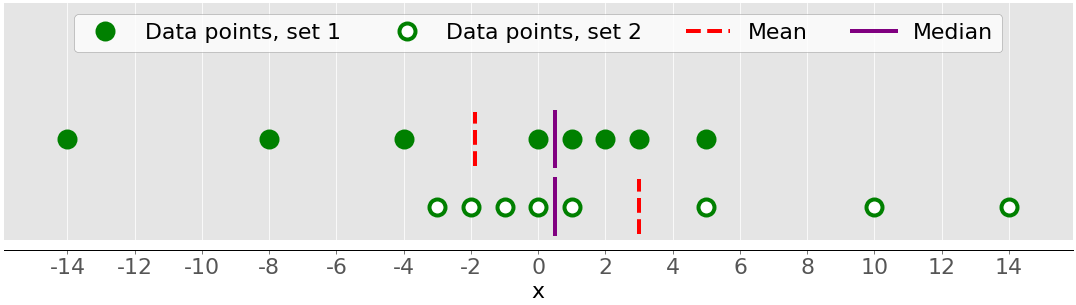

第一组用绿色的点表示，第二组用白色的点表示。通常,负偏度值表明有一个占主导地位的尾巴在左边,正如第一个数据集所示。正偏度值对应于较长的尾巴在右边,正如第二个数据集所示。如果偏态接近0−0.5和0.5之间，那么数据集被认为是完全对称的。

一旦计算了数据集的大小n，样本均值mean_，标准差std_，就可以用纯Python得到样本偏度，代码如下:


In [31]:
def Skew(s, mean=None, std=None):
    """
    计算一组数据的偏度

    入参
    _____
    s: float
       一组数据
    mean: float
       数据的均值
    std: float
        数据的标准差

    返回值
    ______
    skew: float
       数据的偏度
    """
    if (mean == None):
        m = Mean(s)
    else:
        m = mean
    n = len(s)
    if (std == None):
        __std = (sum((item - m)**2 for item in s) / (n - 1))**0.5
    else:
        __std = std
    
    skew = (sum((item - mean_)**3 for item in x)
         * n / ((n - 1) * (n - 2) * std_**3))
    return skew

In [32]:
x = [8.0, 1, 2.5, 4, 28.0]
Skew(x)

1.947043227390592

偏度是正的，所以x有一个右侧的尾部。

也可以使用scipy.stats.skew()计算样本偏度，代码如下：

In [33]:
y, y_with_nan = numpy.array(x), numpy.array(x_with_nan)
scipy.stats.skew(y, bias=False), scipy.stats.skew(y_with_nan, bias=False)

(1.9470432273905927, nan)

得到的结果与纯Python实现相同。参数偏差被设置为False以允许对统计偏差进行更正。可选参数nan_policy可以接受值'propagate'、'raise'或'omit'。scipy.stats.skew()根据该参数决定如何处理nan值。

Pandas Series对象具有.skew()方法，该方法返回数据集的偏度。以下是使用该方法求数据集的偏度：

In [35]:
z, z_with_nan = pandas.Series(x), pandas.Series(x_with_nan)
z.skew(), z_with_nan.skew()

(1.9470432273905924, 1.9470432273905924)

像其他方法一样，.skew()默认情况下忽略nan值，这是因为可选参数skipna的默认值为True。

### 百分位数

百分位数指数据集中百分位𝑝对应的数值，数据集中𝑝%的元素小于或等于这个值，而(100−𝑝)%的元素大于或等于该值。
中位值和四分位数是两种特殊的百分位数。每个数据集有3个四分位数，它们是将数据集分为4部分的百分比:

* 第1个四分位数是样本的第25个百分位数。它从数据集的其余部分中划分出大约25%的最小条目。
* 第2个四分位数是样本的第50百分位或中位数。大约25%的条目在第1和第2四分位数之间，另外25%在第2和第3四分位数之间。
* 第3个四分位数是样本的75个百分位数。它将大约25%的最大条目从数据集的其余部分中分离出来。
每个部分的项目数量大致相同。

以下是纯Python的实现代码：
[引自](http://code.activestate.com/recipes/511478/)

In [73]:
import math

def Percentile(s, percent):
    """
    求数据集中的百分位数
    
    入参
    _____
    s: float
       一组数据
    percent: float
       百分位，0.0～1.0之间的数值
    key: float
        数据的标准差

    返回值
    ______
    p: float
       百分位数
    """
    if not s:
        return None
    k = (len(s)-1) * percent
    f = math.floor(k)
    c = math.ceil(k)
    
    # 整数索引，直接返回数据集中的值
    if f == c:
        return key(s[int(k)])
    
    # 非整数索引，将相邻两个数加权平均
    d0 = s[int(f)] * (c-k)
    d1 = s[int(c)] * (k-f)
    return d0+d1

x = [-5.0, -1.1, 0.1, 2.0, 8.0, 12.8, 21.0, 25.8, 41.0]
Percentile(x, 0.05)

-3.44

以下代码使用函数statistics.quantiles()找出数据集中相应的百分位数：

In [74]:
x = [-5.0, -1.1, 0.1, 2.0, 8.0, 12.8, 21.0, 25.8, 41.0]
statistics.quantiles(x, n=2)

AttributeError: module 'statistics' has no attribute 'quantiles'

In [37]:
statistics.quantiles(x, n=4, method='inclusive')

AttributeError: module 'statistics' has no attribute 'quantiles'

在这个例子中，8.0是x的中位数，而0.1和21.0分别是样本的第25和第75百分位。参数n定义等概率百分位数的个数，参数'method
'决定如何计算它们。

**quantiles是Python3.8引入的新函数**

可以使用numpy.percentile()来确定数据集中的任何样本百分位数。例如，以下代码是找第5和第95百分位数的方法:

In [38]:
y = numpy.array(x)
numpy.percentile(y, 5), numpy.percentile(y, 95)

(-3.44, 34.919999999999995)

percentile()有多个参数。数据集必须作为第一个参数，百分比值作为第二个参数。数据集可以是NumPy数组、列表、元组或类似数据结构的形式。百分比可以是一个0到100之间的数，就像上面的例子一样，但它也可以是一个数值序列。以下代码求3个4分位数：

In [39]:
numpy.percentile(y, [25, 50, 75])

array([ 0.1,  8. , 21. ])

这段代码一次性计算了第25、50和75个百分位数。如果percentile值是一个序列，那么percentile()将返回一个NumPy数组，其中包含结果。

使用函数numpy.nanpercentile()可以忽略数据集中的nan:

In [42]:
y_with_nan = numpy.insert(y, 2, numpy.nan)
y_with_nan

array([-5. , -1.1,  nan,  0.1,  2. ,  8. , 12.8, 21. , 25.8, 41. ])

In [44]:
numpy.nanpercentile(y_with_nan, [25, 50, 75])

array([ 0.1,  8. , 21. ])

NumPy还在quantile()和nanquantile()中提供了非常相似的功能。使用它们需要提供分位数值作为0到1之间的数字，而不是百分数，示例如下:

In [45]:
numpy.quantile(y, 0.05), numpy.quantile(y, 0.95)

(-3.44, 34.919999999999995)

In [46]:
numpy.quantile(y, [0.25, 0.5, 0.75])

array([ 0.1,  8. , 21. ])

In [47]:
numpy.nanquantile(y_with_nan, [0.25, 0.5, 0.75])

array([ 0.1,  8. , 21. ])

结果与前面的示例相同，但是这里的参数介于0和1之间。换句话说，这里传入的是0.05和0.95而不是5和95。

pd.Series对象具有方法.quantile()，可以用来求百分位数，代码如下：

In [49]:
z, z_with_nan = pandas.Series(y), pandas.Series(y_with_nan)
z.quantile(0.05), z.quantile(0.95)

(-3.44, 34.919999999999995)

In [50]:
z.quantile([0.25, 0.5, 0.75]), z_with_nan.quantile([0.25, 0.5, 0.75])

(0.25     0.1
 0.50     8.0
 0.75    21.0
 dtype: float64,
 0.25     0.1
 0.50     8.0
 0.75    21.0
 dtype: float64)

.quantile()以分位值作为参数，这个值可以是0到1之间的一个数值，也可以是一个数值序列。在第一种情况下，.quantile()返回一个标量。在第二种情况下，它返回一个包含结果的新序列。

### 范围

范围是数据集中最小值与最大值的差。根据定义，可以有如下方法求数据集的范围：

* 来自Python标准库的max()和min()
* 来自NumPy的amax()和amin()
* 来自NumPy的忽略nan值的nanmax()和nanmin()
* 来自NumPy的对象方法.max()和.min()
* 来自Pandas Series对象的方法.max()和.min()，这两个方法在默认情况下忽略nan值

下面是纯Python求数据范围的代码：

In [52]:
def Range(s):
    """
    计算一组数据的范围

    入参
    _____
    s: float
       一组数据

    返回值
    ______
    range: float
       数据的范围
    """
    return max(s) - min(s)
x, Range(x)

([-5.0, -1.1, 0.1, 2.0, 8.0, 12.8, 21.0, 25.8, 41.0], 46.0)

函数numpy.ptp()可以用于求数据集的范围，代码如下：

In [75]:
numpy.ptp(y), numpy.ptp(z)

(46.0, 46.0)

In [76]:
numpy.ptp(y_with_nan), numpy.ptp(z_with_nan)

(nan, nan)

如果数据中含有nan，则函数将返回nan。

In [80]:
numpy.ptp(z_with_nan)

nan

四分位数范围是第1和第3个四分位数之间的差。一旦计算了四分位数，就可以取它们的差，代码如下:

In [81]:
quartiles = numpy.quantile(y, [0.25, 0.75])
quartiles[1] - quartiles[0]

20.9

In [82]:
quartiles = z.quantile([0.25, 0.75])
quartiles[0.75] - quartiles[0.25]

20.9

注意，访问Pandas Series对象时使用的是标签（0.75和0.25）。


## 描述性统计综述

SciPy和Pandas提供了有用的例程，可以通过单个函数或方法调用快速获得描述性统计数据。我们可以像以下代码一样使用scipy.stats.describe() ：

In [83]:
result = scipy.stats.describe(y, ddof=1, bias=False)
result

DescribeResult(nobs=9, minmax=(-5.0, 41.0), mean=11.622222222222222, variance=228.75194444444446, skewness=0.9249043136685094, kurtosis=0.14770623629658886)

数据集作为该函数的第一个参数。参数可以是NumPy数组、列表、元组或类似的数据结构。可以忽略ddof=1，因为它是默认值，并且只在计算方差时起作用。bias=False用来强制纠正统计偏差的偏斜度和峰度。可选参数nan_policy可以接受值'propagate'(默认)、'raise'(错误)或'omit'。这个参数用来控制存在nan值时发生的操作。

函数describe()返回包含以下描述性统计信息的对象：

* nobs：数据集中的观测值或元素数
* minmax：有数据集的最小值和最大值的元组
* mean：数据集的均值
* variance：数据集的方差
* skewness：数据集的偏度
* kurtosis：数据集的峰度

可以使用dot运算符访问特定值，代码如下：


In [84]:
result.nobs

9

In [85]:
result.minmax[0], result.minmax[1] 

(-5.0, 41.0)

In [86]:
result.mean, result.variance

(11.622222222222222, 228.75194444444446)

In [87]:
result.skewness, result.kurtosis

(0.9249043136685094, 0.14770623629658886)

使用SciPy，只需调用一个函数就可以对数据集进行描述性统计摘要。

Pandas的Series对象有类似的方法，代码如下：

In [88]:
result = z.describe()
result

count     9.000000
mean     11.622222
std      15.124548
min      -5.000000
25%       0.100000
50%       8.000000
75%      21.000000
max      41.000000
dtype: float64

它返回一个包含以下内容的新Series对象:

* count: 数据集中的元素数量
* mean: 数据集的均值
* std: 数据集的标准差
* min and max: 数据集的最大最小值
* 25%, 50%, and 75%: 数据集的4分位数

如果希望生成的Series对象包含其他百分位数，则应指定可选参数percentiles的值。

结果中的每个项目可以使用其标签访问，代码如下：

In [89]:
result['mean'], result['std']


(11.622222222222222, 15.12454774346805)

In [90]:
result['min'], result['max']

(-5.0, 41.0)

In [91]:
result['25%'], result['50%'], result['75%']

(0.1, 8.0, 21.0)

这样通过使用Pandas Series对象的单个方法调用便获得该对象的描述性统计信息。

## 对数据之间相关性的度量

数据集中两个变量对应元素之间的关系是数据的重要特性之一。假设有两个数据集X、Y，它们拥有同等数量的元素。现在令𝑥₁对应𝑦₁，𝑥₂对应于𝑦₂，以此类推。
可以认为有𝑛对相应的元素:(𝑥₁,𝑦₁),(𝑥₂,𝑦₂),等等。

我们将看到以下数据对之间的相关性度量:

* 正相关关系，𝑦值随𝑥值的增大增大，反之亦然。
* 存在负相关，𝑦值随𝑥值的增大减小，反之亦然。
* 如果没有这种明显的关系，则存在微弱的或不存在相关性。

**注意:在处理一对变量之间的相关性时，有一件重要的事情应该牢记在心，那就是相关性不是因果关系的度量或指标!**

测量数据集之间相关性的两个统计量是协方差和相关系数。以下代码定义了一些数据来使用这些度量。代码中创建了两个Python列表，并使用它们获得相应的NumPy数组和Pandas Series:

In [92]:
x = list(range(-10, 11))
y = [0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14]
x_, y_ = numpy.array(x), numpy.array(y)
x__, y__ = pandas.Series(x_), pandas.Series(y_)

### 协方差

样本协方差是一种度量，用于量化一对数据之间关系的强度和方向：

* 如果相关为正，则协方差也为正。关系越强，协方差值越高。
* 相关为负，则协方差也为负。较强的关系对应于协方差的较低（或较高的绝对）值。
* 如果相关性较弱，则协方差接近零。

两组数据之间的协方差的数学定义是：${s^{XY}=\frac{\sum_{i=1}^{n}{(x_i-mean(x))(y_i-mean(y))}}{n-1}}$，其中𝑖= 1，2，…，𝑛，
mean(𝑥)是𝑥的样本均值，而mean(y)是𝑦的样本均值。
因此，两个相同变量的协方差实际上就是方差。

以下是计算协方差的纯Python代码


In [93]:
n = len(x)
mean_x, mean_y = sum(x) / n, sum(y) / n
cov_xy = (sum((x[k] - mean_x) * (y[k] - mean_y) for k in range(n))
          / (n - 1))
cov_xy

19.95

首先，你必须求出x和y的均值，然后应用协方差的数学公式。

NumPy函数cov()返回协方差矩阵，代码如下:


In [95]:
cov_matrix = numpy.cov(x_, y_)
cov_matrix

array([[38.5       , 19.95      ],
       [19.95      , 13.91428571]])

注意，cov()有可选参数bias，默认值为False, ddof默认值为None。它们的默认值适合于得到样本协方差矩阵。协方差矩阵左上方的元素是x和x的协方差，或者x的方差，类似地，右下方的元素是y和y的协方差，或者y的方差。以下是验证代码:

In [96]:
x_.var(ddof=1), y_.var(ddof=1)

(38.5, 13.914285714285711)

从结果可见，x和y的方差分别等于cov_matrix [0，0]和cov_matrix [1，1]。

协方差矩阵的其他两个元素相等，表示x和y之间的实际协方差，它们与纯Python的协方差值相同。

Pandas Series对象具有.cov（）方法，以下代码使用它来计算协方差：

In [97]:
x__.cov(y__), y__.cov(x__)

(19.950000000000003, 19.950000000000003)

### 相关系数

相关系数另一种衡量数据之间相关性的方法。可以把它看成标准化协方差。以下是关于它的一些重要事实:

* 𝑟 > 0表示正相关。
* 𝑟 < 0表示负相关。
* r = 1是𝑟的最大可能值。它对应于变量之间完美的正线性关系。
* r = −1是𝑟的最小可能值。它对应于变量之间的完全负线性关系。
* r ≈ 0, 意味着变量之间的相关性是微弱的。 

相关系数的数学公式为${r=\frac{s_{XY}}{s_Xs_Y}}$，其中𝑠ˣ和𝑠ʸ分别是X和Y标准偏差。如果数据集X和Y的均值（mean_x和mean_y）和标准差（std_x，std_y）以及它们的协方差cov_xy已知，则可以使用纯Python计算相关系数，代码如下：

In [98]:
var_x = sum((item - mean_x)**2 for item in x) / (n - 1)
var_y = sum((item - mean_y)**2 for item in y) / (n - 1)
std_x, std_y = var_x ** 0.5, var_y ** 0.5
r = cov_xy / (std_x * std_y)
r


0.861950005631606

scipy.stats的函数pearsonr()可以计算相关系数和检验p值。代码如下：

In [99]:
r, p = scipy.stats.pearsonr(x_, y_)
r, p


(0.8619500056316061, 5.122760847201135e-07)

函数pearsonr()返回一个包含两个数字的元组。第一个是Pearson 相关系数和第二个是检验p值。

与协方差矩阵的情况类似，可以应用numpy.corrcoef()，以x_和y_为参数，得到相关系数矩阵，代码如下:

In [104]:
corr_matrix = numpy.corrcoef(x_, y_)
corr_matrix

array([[1.        , 0.86195001],
       [0.86195001, 1.        ]])

左上角的元素是x_和x_之间的相关系数。右下角的元素是y_和y_之间的相关系数。它们的值等于1.0。其他两个元素相等，表示x_和y_之间的实际相关系数。

也可以使用函数scipy.stats.linregress()得到相关系数，代码如下：

In [105]:
scipy.stats.linregress(x_, y_)

LinregressResult(slope=0.5181818181818182, intercept=5.714285714285714, rvalue=0.8619500056316061, pvalue=5.122760847201128e-07, stderr=0.06992387660074978)

linregress()取x_和y_，进行线性回归，并返回结果。斜率和截距是回归线的方程，右值是相关系数。要从linregress()的结果中访问特定值，包括相关系数，可以使用点符号:

In [106]:
result = scipy.stats.linregress(x_, y_)
r = result.rvalue
r

0.8619500056316061

Pandas的Series对象具有.corr（）方法来计算相关系数，代码如下：

In [107]:
x__.corr(y__), y__.corr(x__)

(0.8619500056316062, 0.8619500056316062)